In [1]:
! pip install wandb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist,mnist
import pandas as pd
import wandb

In [2]:
# Question - 2 solution
def softMax_q2(aL):
    den=0
    aL = np.clip(aL,-499,499)
    for i in range(10):
        den+=np.exp(aL[0][i])
    y = np.zeros(10)
    for i in range(10):
        y[i] = np.exp(aL[0][i])/den
    return y
    
def forward_pass(X,hiddenLayers,bias,weightMatrix):
    probability=[]
    for x in X:
        input = x.reshape(1,-1).T
        for i in range(1,hiddenLayers+1):
            a_i = bias[i].T + weightMatrix[i]@input
            h_i = np.tanh(a_i)
            input=h_i
        a_l = bias[hiddenLayers+1].T+weightMatrix[hiddenLayers+1]@h_i
        out = softMax_q2(a_l.T)
        probability.append(out)
    return probability

# 2nd question
def q2():
    neuronPerHiddenLayer = [16,16,16]
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    inputLayerNeuron = train_images.shape[1]*train_images.shape[2]
    outputLayerNeuron = 10
    train_images = train_images/255.0
    neuronPerLayer = [inputLayerNeuron] + neuronPerHiddenLayer + [outputLayerNeuron]
    weightMatrix = [0]
    bias = [0]
    for j in range(1,len(neuronPerLayer)):
        limit = np.sqrt(2/float(neuronPerLayer[j] + neuronPerLayer[j-1]))
        weightMatrix.append(np.random.normal(0.0,limit,size = (neuronPerLayer[j],neuronPerLayer[j-1])))
        bias.append(np.zeros((1,neuronPerLayer[j])))
    hiddenLayers = len(neuronPerHiddenLayer)
    
    answers = forward_pass(train_images,hiddenLayers,bias,weightMatrix)
    np.set_printoptions(suppress=True)
    print(answers[0])
    # print(sum(answers[0]))
# q2()

In [3]:
def get_weights_random(row,col):
    return (np.random.randn(row,col))*0.01
def get_weights_xavier(row,col):
    return (np.random.randn(row,col)*np.sqrt(2/(row+col)))
def update_type(x):
    return np.array(x,dtype=object)
def initialize_params(method,hidden_layers,neurons):   
    L=hidden_layers+1
    weights = []
    biases = []
    prev_updates_W = []
    prev_updates_B = []
    for i in range(hidden_layers+2):
        weights.append(0)
        biases.append(0)
        prev_updates_B.append(0)
        prev_updates_W.append(0)
   
    np.random.seed(55)
    if(method=="random"):
        for i in range(1,hidden_layers+2):
            weights[i]=get_weights_random(neurons[i],neurons[i-1])
            biases[i]=(np.zeros((neurons[i],1)))
            prev_updates_W[i]=np.zeros((neurons[i],neurons[i-1]))
            prev_updates_B[i]=np.zeros((neurons[i],1))
    else:
        for i in range(1,hidden_layers+2):
            weights[i]=get_weights_xavier(neurons[i],neurons[i-1])
            biases[i]=(np.zeros((neurons[i],1)))
            prev_updates_W[i]=np.zeros((neurons[i],neurons[i-1]))
            prev_updates_B[i]=np.zeros((neurons[i],1))

    prev_updates_B=update_type(prev_updates_B)
    prev_updates_W=update_type(prev_updates_W)
    biases=update_type(biases)
    weights=update_type(weights)
    return weights,biases,prev_updates_W,prev_updates_B

In [4]:
def d_Relu(x):
    return 1*(x>0) 

def Relu(x):
    rl = np.maximum(0,x)
    return rl

def sigmoid(x):
    sig_val = 1.0 / (1.0 + np.exp(-np.clip(x, -499, 499)))
    return sig_val

def d_sigmoid(x):
    return sigmoid(x)* np.subtract(1, sigmoid(x))

def softmax(x):
    x=x-np.max(x,axis=0)
    # Softmax for calculating the final layer h[i]
    # print(np.exp(x))
    # print(np.sum(np.exp(x)))
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def tanh(x):
    tan_val = np.tanh(x)
    return tan_val

def d_tanh(x):
    return (1 - (np.tanh(x)**2))
    
def identity(x):
    return x

### Question-1

wandb: Currently logged in as: cs23m055 (cs23m055_assignment_1). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\ravis\.netrc
wandb: Currently logged in as: cs23m055. Use `wandb login --relogin` to force relogin


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\ravis\.netrc


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\ravis\.netrc


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\ravis\.netrc


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\ravis\.netrc


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\ravis\.netrc


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\ravis\.netrc


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\ravis\.netrc


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\ravis\.netrc


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\ravis\.netrc


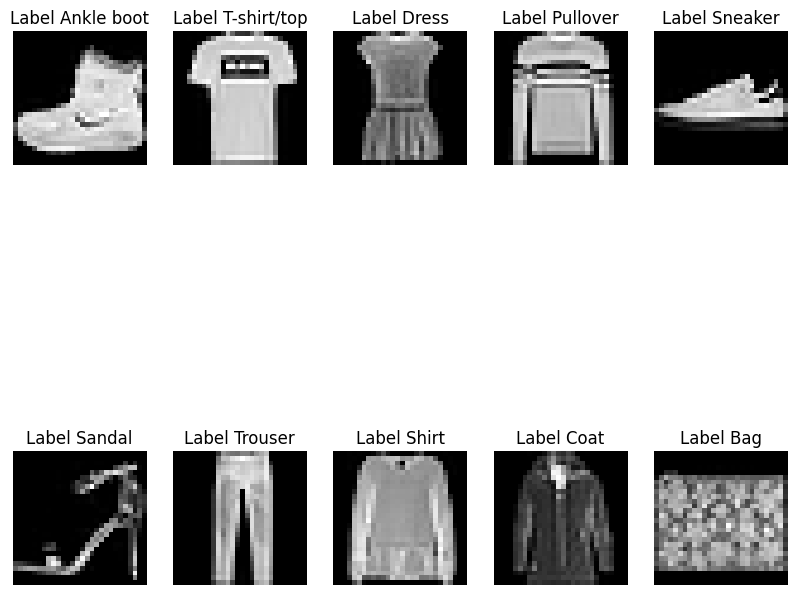

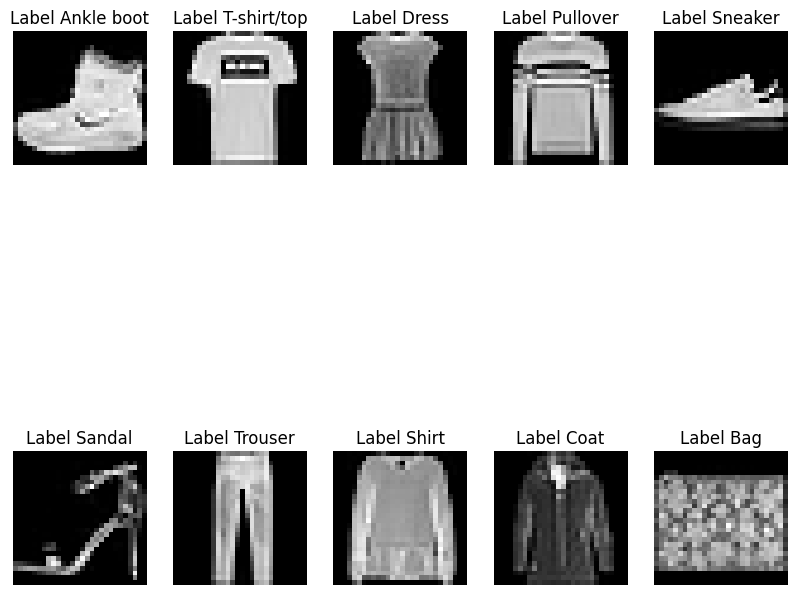

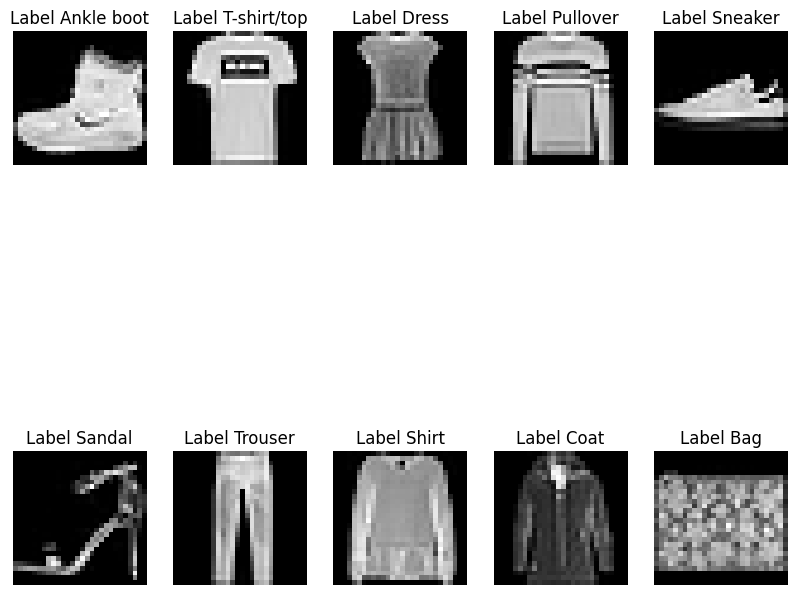

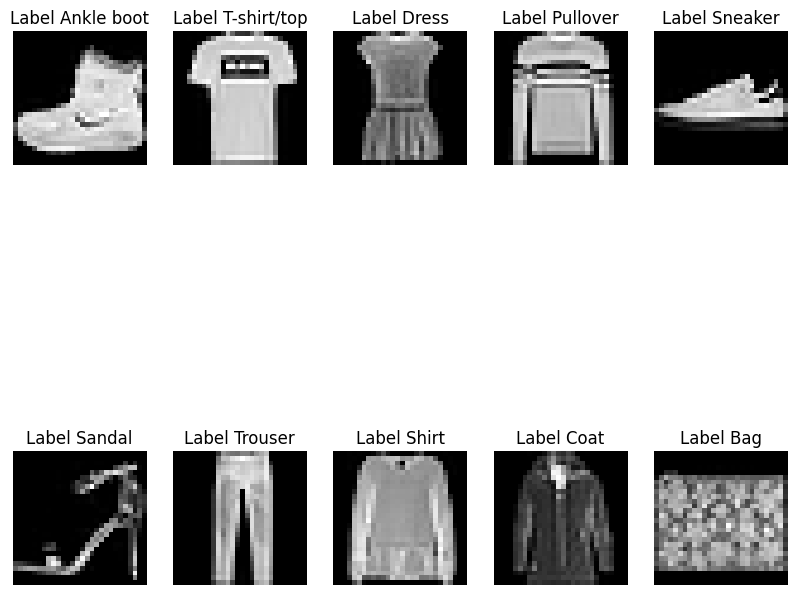

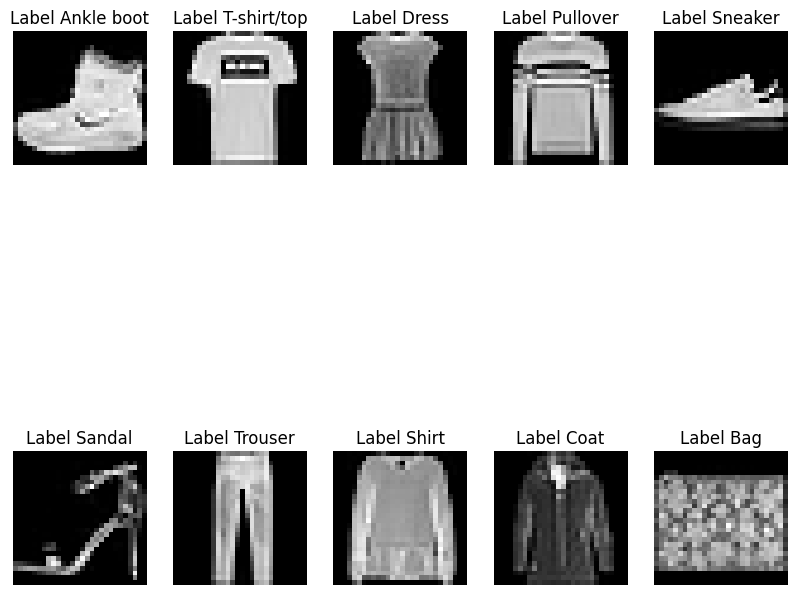

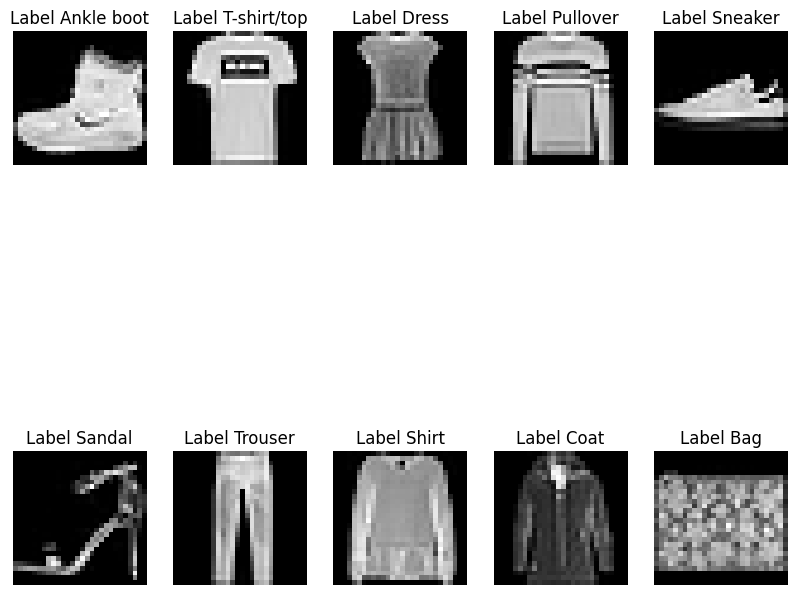

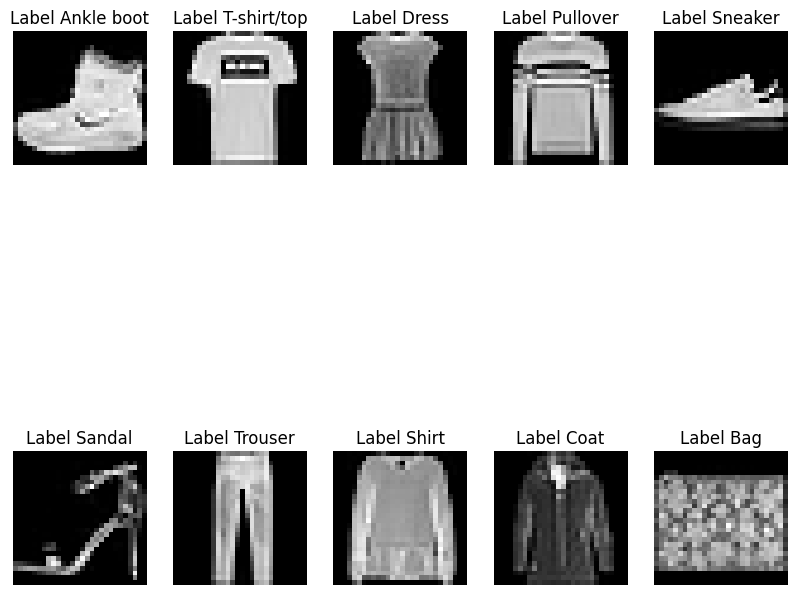

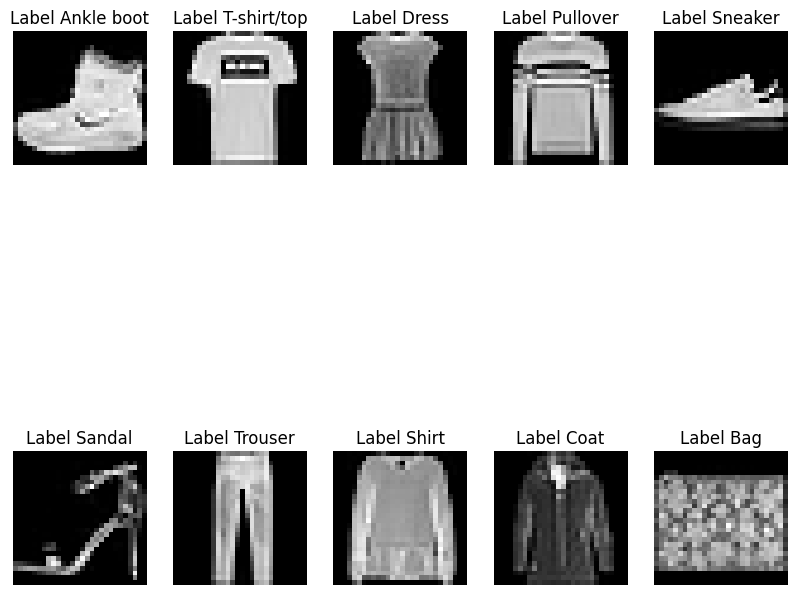

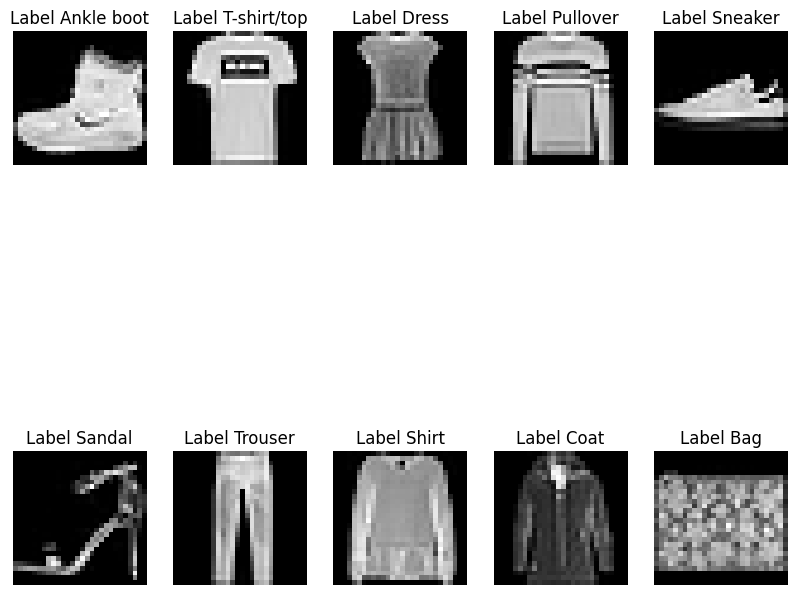

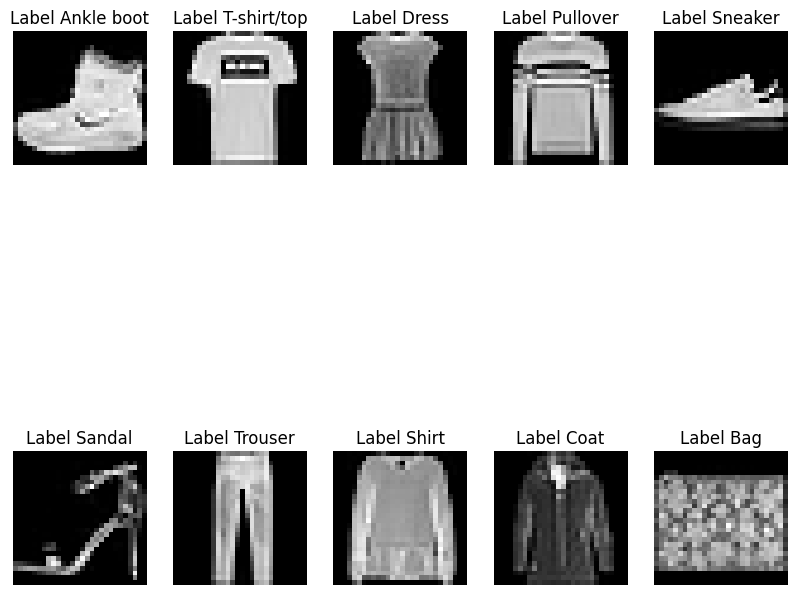

In [2]:
def plot_images():
    wandb.login(key = "67fcf10073b0d1bfeee44a1e4bd6f3eb5b674f8e")
    # start a new wandb run to track this script
    wandb.init(project="final_version",entity="cs23m055")
    
    (training_data, training_label), (test_data, test_label) =fashion_mnist.load_data()
    labels=[]
    classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
   
    fig,ax = plt.subplots(2,5,figsize=(10,10))
    cnt = 0
    for i in range(len(training_data)):
        if(cnt==10):
            break
        if(training_label[i] not in labels):
            labels.append(training_label[i])
            ax[cnt//5][cnt%5].imshow(training_data[i],cmap="gray")
            ax[cnt//5][cnt%5].set_title("Label {}".format(classes[training_label[i]]))
            ax[cnt//5][cnt%5].axis(False)
            cnt+=1
            
    wandb.log({"plt":plt})
    wandb.run.name = "Fashion_Mnist_Images"
    wandb.run.save("end")
    # wandb.run.finish()
    wandb.finish()
for i in range(10):
    plot_images()

### Fetch data

In [6]:
def load_fashion_mnist():
    (training_data, training_label), (test_data, test_label) = fashion_mnist.load_data()
    return training_data,training_label,test_data, test_label
    
def load_mnist():
    (training_data, training_label), (test_data, test_label) = mnist.load_data()
    return training_data,training_label,test_data, test_label
    
def normalize(data):
    return (data/255.0).reshape(data.shape[0],data.shape[1]*data.shape[2])
    
def transposed_data(training_data,training_label,train_x,train_y,validation_x,validation_y,test_data, test_label):
    validation_x=validation_x.T
    validation_y=validation_y.T
    
    train_x=train_x.T
    train_y=train_y.T
    
    training_data=training_data.T
    test_data=test_data.T
    return training_data,training_label,train_x,train_y,validation_x,validation_y,test_data, test_label
    
def collect_data(dataset="fashion_mnist"):
    #Load Dataset
    if(dataset=="mnist"):
        training_data,training_label,test_data, test_label = load_mnist()
    else:
        training_data,training_label,test_data, test_label = load_fashion_mnist()
        
    num_inputs=training_data.shape[1]*training_data.shape[2]
    
    #Normalize dataSet
    training_data = normalize(training_data)
    test_data = normalize(test_data)
    
    train_x,validation_x,train_y,validation_y=train_test_split(training_data,training_label,test_size=0.1,random_state=55)
    return transposed_data(training_data,training_label,train_x,train_y,validation_x,validation_y,test_data, test_label)

def encode_y(y):
    exp_y=np.zeros((10,y.shape[0]))
    i=0
    while(i<y.shape[0]):
        exp_y[y[i]][i]=1
        i+=1
    return exp_y
    

In [7]:
def post_activation(activation,a_i):
    if(activation=='ReLU'):
        return (Relu(a_i))
    if(activation=='sigmoid'):
        return (sigmoid(a_i))
    if(activation=='tanh'):
        return (tanh(a_i))
    if(activation=='identity'):
        return (identity(a_i))

def FeedForwardNetwork(weights,biases,L,data,activation):
    a=[]
    h=[]
    for i in range(L+1):
        a.append(0)
        h.append(0)
    h[0]=data
    # print("ff",data.shape)
    for i in range(1,L+1):
        weight=weights[i]
        bias=biases[i]
        
        a[i]=(bias + weight@h[i-1])
        
        # Output layer calculation and then return
        if(i==L):
            h[i]=softmax(a[i])
            return h[L],h,a
            
        #h_i calculation
        h[i]=post_activation(activation,a[i])


## Back propagation

In [8]:
def grad_multiplication(activation,level,gradients_H,A):
    if(activation=='identity'):
        return gradients_H[k-1]
    elif(activation=='sigmoid'):
        return d_sigmoid(A[level-1])*gradients_H[level-1]
    elif(activation=='ReLU'):
        return d_Relu(A[level-1])*gradients_H[level-1]
    else:
        return d_tanh(A[level-1])*gradients_H[level-1]
    
        
def BackPropogation(weights,L,H,A,exp_Y,y_hat,activation,loss="cross_entropy"):
    
    grad_A=[]
    gradients_B=[]
    gradients_H=[]
    gradients_W=[]
    
    for i in range(L+1):
        gradients_H.append(0)
        gradients_W.append(0)
        gradients_B.append(0)
        grad_A.append(0)
    
    # Gradient-Output Layer
    if loss=="mean_squared_error":
        s = np.exp(A[L]-np.max(A[L]))/np.sum(np.exp(A[L]-np.max(A[L])),axis=0)
        grad_A[L]=-(exp_Y-y_hat) * s * (1-s)
        
    else:
        grad_A[L]=-(exp_Y-y_hat)
    
    # print(H[0].shape)
    # print(H.shape)
    ax=1
    for level in range(L,0,-1):
        #gradients - parameters
        gradients_W[level]=grad_A[level]@H[level-1].T
        gradients_B[level]=np.sum(grad_A[level], axis=ax,keepdims=True)
        gradients_H[level-1]=weights[level].T@grad_A[level]
        if(level>1):
            grad_A[level-1] = grad_multiplication(activation,level,gradients_H,A)
            
    return gradients_W,gradients_B

### accuracy,loss

In [9]:
def L2_regularization(weights,data_size,lambda_):
    sq_sum = 0
    for i in range(1,len(weights)):
        sq_sum+=np.sum(np.square(weights[i]))
    return (lambda_/(2*data_size))*sq_sum
    
def loss_calculation(weights,y,exp_y,loss,L2_lamb):
    size_of_data = y.shape[1]
    validation_loss=0
    if loss=='mean_squared_error':
        p_x=(y-exp_y)**2
        validation_loss= 0.5 * np.sum(p_x)/size_of_data
    else:
        epsilon = 1e-9
        p_x= exp_y*np.log(y+epsilon)
        validation_loss= -np.sum(p_x)/size_of_data
    
    # L2_regulaization
    validation_loss = validation_loss + L2_regularization(weights,size_of_data,L2_lamb)
    return validation_loss

def accuracy_calculation(y,predicted_y):
    if len(y) != len(predicted_y):
        raise ValueError("Lengths of y and predicted_y must be the same")

    # Calculate the number of correct predictions
    correct_predictions = sum(1 for true_label, pred_label in zip(y, predicted_y) if true_label == pred_label)

    # Calculate the total number of predictions
    total_predictions = len(y)

    # Calculate accuracy
    accuracy = (correct_predictions / total_predictions) * 100

    return accuracy

## Optimizer

In [10]:
def updateSGDParameters(weights,biases,gradients_W,gradients_B,eta,totalLayers,L2_lamb):
    gradients_B,gradients_W=np.array(gradients_B,dtype=object),np.array(gradients_W,dtype=object)
    currentLayer = 1
    while(currentLayer!=totalLayers+1):
        weights[currentLayer]+=-eta*gradients_W[currentLayer]
        weights[currentLayer]+=-(eta * L2_lamb * weights[currentLayer])
        biases[currentLayer]+=-eta*gradients_B[currentLayer]
        currentLayer+=1
    return weights,biases


def updateMomentumParameters(weights, biases, gradients_B,gradients_W, beta, previous_updates_W,previous_updates_B,eta,totalLayers,L2_lamb):
    gradients_B,gradients_W=np.array(gradients_B,dtype=object),np.array(gradients_W,dtype=object)
    currentLayer=1
    while(currentLayer!=totalLayers+1):
        previous_updates_W[currentLayer]=beta*previous_updates_W[currentLayer]
        previous_updates_W[currentLayer]+=(1-beta)*gradients_W[currentLayer]
        previous_updates_B[currentLayer]=beta*previous_updates_B[currentLayer]
        previous_updates_B[currentLayer]=previous_updates_B[currentLayer]+(1-beta)*gradients_B[currentLayer]
        weights[currentLayer]-=eta*previous_updates_W[currentLayer]+(eta * L2_lamb * weights[currentLayer])
        biases[currentLayer]-=eta*previous_updates_B[currentLayer]
        currentLayer+=1
    return weights,biases,previous_updates_W,previous_updates_B
    
def util_(x):
    return 1/np.exp(x)
def updateAdamParameter(weights, biases, gradients_B,gradients_W,eta, m_W,m_B,v_W,v_B,t,totalLayers,L2_lamb,beta1,beta2,epsilon):
    gradients_B,gradients_W=np.array(gradients_B,dtype=object),np.array(gradients_W,dtype=object)
    currentLayer=1
    while(currentLayer<totalLayers+1):
        m_dw=beta1*m_W[currentLayer]
        m_dw+=(1-beta1)*gradients_W[currentLayer]
        v_dw=beta2*v_W[currentLayer]
        v_dw+=(1-beta2)*(gradients_W[currentLayer]**2)
        
        m_W_hat=m_dw/(1.0 -beta1**t)
        v_W_hat=v_dw/(1.0 -beta2**t)
        
        v_W[currentLayer]=v_dw
        m_W[currentLayer]=m_dw
        t1=util_(m_W[currentLayer])
        m_db=beta1*m_B[currentLayer]+(1-beta1)*gradients_B[currentLayer]
        v_db=beta2*v_B[currentLayer]+(1-beta2)*(gradients_B[currentLayer]**2)
        # print(np.square(gradients_B[currentLayer]))
        m_B_hat=m_db/(1.0 -beta1**t)
        v_B_hat=v_db/(1.0 -beta2**t)
        # print(weights)
        weights[currentLayer]+=-(eta*m_W_hat)/((v_W_hat+epsilon)**0.5)-(eta * L2_lamb * weights[currentLayer])
        biases[currentLayer]+=-(eta*m_B_hat)/(v_B_hat+epsilon)**0.5
        
        # print(weights)
        # print(biases)
        
        v_B[currentLayer]=v_db
        m_B[currentLayer]=m_db
        # print(v_db)
        # print(m_db)
        currentLayer+=1
    t=t+1
    return weights,biases,m_W,m_B,v_W,v_B,t
def update(x):
    return np.array(x,dtype=object)

def rmsprop_params_update(weights, biases, gradients_B,gradients_W, beta,eta, W_v,B_v,L,L2_lamb):
    gradients_B=update(gradients_B)
    gradients_W=update(gradients_W)
    currentLayer=1
    while(currentLayer<L+1):
        v_dw= beta*W_v[currentLayer]+gradients_W[currentLayer]*gradients_W[currentLayer]
        v_db= beta*B_v[currentLayer]+gradients_B[currentLayer]*gradients_B[currentLayer]
        weights[currentLayer]+=-(eta*(gradients_W[currentLayer]))/((v_dw)+1e-4)**0.5-(eta * L2_lamb * weights[currentLayer])
        biases[currentLayer]+=-(eta*(gradients_B[currentLayer]))/((v_db)+1e-4)**0.5
        W_v[currentLayer]=v_dw
        B_v[currentLayer]=v_db
        currentLayer+=1
    return weights,biases,W_v,B_v


### LEARNING PARAMETERS

In [11]:
def learning_params(hidden_layers,neuron,training_data,training_label,x_val,y_val,learning_algorithm,eta,epochs,BS,activation,init_method,L2_lamb,momentum=0.9 ,beta=0.9 ,beta1=0.9 ,beta2=0.99 ,epsilon=0.00001,loss="cross_entropy"):
    global my_models
    count=1
    predicted_y=[]
    L=hidden_layers+1
    neurons=[neuron]*(L)
    neurons[0] = training_data.shape[0]
    neurons.append(10)
    exp_y=encode_y(training_label)
    exp_y_val=encode_y(y_val)
    # print(exp_y.shape)
    weights,biases,previous_updates_W,previous_updates_B=initialize_params(init_method,hidden_layers,neurons)
    epoch_train_loss=list()
    epoch_val_loss=list()
    acc_val=list()
    acc_train=list()
    t=1
    v_W = np.copy(previous_updates_W)
    m_W = np.copy(previous_updates_W)
    v_B = np.copy(previous_updates_B)
    m_B = np.copy(previous_updates_B)
    # print("total epochs",epochs)
    # print("learn",training_data.shape)
    for count in range(1,epochs+1):
        # print("current epoch : ", count)
        for i in range(0,training_data.shape[1],BS):
            mini_batch=training_data[:,i:i+BS]
            if learning_algorithm=='momentum':
                output,post_act,pre_act=FeedForwardNetwork(weights,biases,L,mini_batch,activation)
                gradients_W,gradients_B=BackPropogation(weights,L,post_act,pre_act,exp_y[:,i:i+BS],output,activation,loss)
                weights,biases,previous_updates_W,previous_updates_B=updateMomentumParameters(weights, biases, gradients_B,gradients_W, momentum, previous_updates_W,previous_updates_B,eta,L,L2_lamb)
            elif learning_algorithm=='nag':
                W_look_ahead=weights-(beta)*previous_updates_W
                B_look_ahead=biases-(beta)*previous_updates_B
                output,post_act,pre_act=FeedForwardNetwork(W_look_ahead,B_look_ahead,L,mini_batch,activation)
                gradients_W,gradients_B=BackPropogation(W_look_ahead,L,post_act,pre_act,exp_y[:,i:i+BS],output,activation,loss)
                weights,biases,previous_updates_W,previous_updates_B=updateMomentumParameters(weights,biases, gradients_B,gradients_W, beta, previous_updates_W,previous_updates_B,eta,L,L2_lamb)
            elif learning_algorithm=='adam':
                output,post_act,pre_act=FeedForwardNetwork(weights,biases,L,mini_batch,activation)
                gradients_W,gradients_B=BackPropogation(weights,L,post_act,pre_act,exp_y[:,i:i+BS],output,activation,loss)
                weights,biases,m_W,m_B,v_W,v_B,t= updateAdamParameter(weights, biases, gradients_B,gradients_W,eta, m_W,m_B,v_W,v_B, t,L,L2_lamb,beta1,beta2,epsilon)
            elif learning_algorithm=='nadam':
                W_look_ahead=weights-(beta)*previous_updates_W
                B_look_ahead=biases-(beta)*previous_updates_B
                output,post_act,pre_act=FeedForwardNetwork(W_look_ahead,B_look_ahead,L,mini_batch,activation)
                gradients_W,gradients_B=BackPropogation(W_look_ahead,L,post_act,pre_act,exp_y[:,i:i+BS],output,activation,loss)
                weights,biases,m_W,m_B,v_W,v_B,t= updateAdamParameter(weights, biases, gradients_B,gradients_W,eta, m_W,m_B,v_W,v_B, t,L,L2_lamb,beta1,beta2,epsilon)
            elif learning_algorithm=='sgd':
                output,post_act,pre_act=FeedForwardNetwork(weights,biases,L,mini_batch,activation)
                gradients_W,gradients_B=BackPropogation(weights,L,post_act,pre_act,exp_y[:,i:i+BS],output,activation,loss)
                weights,biases=updateSGDParameters(weights,biases,gradients_W,gradients_B,eta,L,L2_lamb)
            else:
                output,post_act,pre_act=FeedForwardNetwork(weights,biases,L,mini_batch,activation)
                gradients_W,gradients_B=BackPropogation(weights,L,post_act,pre_act,exp_y[:,i:i+BS],output,activation,loss)
                weights,biases,previous_updates_W,previous_updates_B = rmsprop_params_update(weights, biases, gradients_B,gradients_W, beta,eta, previous_updates_W,previous_updates_B,L,L2_lamb)
        
        full_output_val,hl_val,a_val=FeedForwardNetwork(weights,biases,L,x_val,activation)   
        full_output_train,hl_train,a_train=FeedForwardNetwork(weights,biases,L,training_data,activation)

        training_loss=loss_calculation(weights,full_output_train,exp_y,loss,L2_lamb)
        validation_loss=loss_calculation(weights,full_output_val,exp_y_val,loss,L2_lamb)
        acc_train.append(accuracy_calculation(training_label,np.argmax(full_output_train,axis=0)))
        acc_val.append(accuracy_calculation(y_val,np.argmax(full_output_val,axis=0)))
        epoch_val_loss.append(validation_loss)
        epoch_train_loss.append(training_loss)
        
    # print(type(weights),type(biases),type(epoch_train_loss),type(epoch_val_loss),type(acc_train),type(acc_val))
    return weights,biases,epoch_train_loss,epoch_val_loss,acc_train,acc_val

In [14]:
different_configuration_runs = []
def run_sweeps(train_x,train_y,validation_x,validation_y):

    # config = {
    #         "project":"final_version",
    #         "method": 'random',
    #         "metric": {
    #         'name': 'acc',
    #         'goal': 'maximize'
    #         },
    #         'parameters' :{
    #         "activation": {"values":["ReLU"]},
    #         "weight_init":{"values":["xavier"]},
    #         "BS": {"values":[16]},
    #         "L2_lamb":{"values":[0]},
    #         "eta": {"values":[1e-3]},
    #         "hidden_layers": {"values":[3]},
    #         "learning_algorithm": {"values":["nag"]},
    #         "neurons": {"values": [128]},
    #         "epoch": {"values":[10]}
    #         }
    # }
    config = {
        "project":"final_version",
        "method": 'bayes',
        "metric": {
        'name': 'acc',
        'goal': 'maximize'
        },
        'parameters' :{
        "activation": {"values":["tanh","ReLU","sigmoid"]},
        "weight_init":{"values":["random","xavier"]},
        "BS": {"values":[16,32,64]},
        "L2_lamb":{"values":[0,0.0005,0.5]},
        "eta": {"values":[1e-3,1e-4]},
        "hidden_layers": {"values":[3,4,5]},
        "learning_algorithm": {"values":["momentum","sgd","nag","rmsprop","nadam","adam"]},
        "neurons": {"values": [32,64,128]},
        "epoch": {"values":[5,10]}
        }
    }

    def training():
        wandb.init()
        weights,biases,epoch_train_loss,epoch_val_loss,training_accuracy,acc_val=learning_params(wandb.config.hidden_layers,wandb.config.neurons,train_x,train_y,validation_x,validation_y,wandb.config.learning_algorithm,wandb.config.eta,wandb.config.epoch,wandb.config.BS,wandb.config.activation,wandb.config.weight_init,wandb.config.L2_lamb)
        for i in range(len(epoch_train_loss)):
            wandb.log({"accuracy":training_accuracy[i]})
            wandb.log({"val_acc":acc_val[i]})
            wandb.log({"epoch": (i+1)})
            wandb.log({"loss":epoch_train_loss[i]})
            wandb.log({"val_loss":epoch_val_loss[i]})
            
        different_configuration_runs.append([weights,biases,wandb.config.hidden_layers,wandb.config.neurons,wandb,wandb.config.learning_algorithm,wandb.config.eta,wandb.config.epoch,wandb.config.BS,wandb.config.activation,wandb.config.weight_init,wandb.config.L2_lamb,acc_val[-1]])
        wandb.log({"acc":acc_val[-1]})
        wandb.run.name = 'hl_'+str(wandb.config.hidden_layers)+"_bs_"+str(wandb.config.BS)+"_ac_"+str(wandb.config.activation)
        wandb.run.save("end")
        wandb.run.finish()
    sweep_id=wandb.sweep(config,project="final_version")
    wandb.agent(sweep_id,function=training,count=10)

## Confusion Matrix

In [13]:
def log_confusion_mat():
    wandb.login(key = "67fcf10073b0d1bfeee44a1e4bd6f3eb5b674f8e")
    wandb.init(project="final_version-mat",entity="cs23m055")
    _,_,train_x,train_y,validation_x,validation_y,test_data,test_label=collect_data()
    best_acc=-1
    best_config=None
    if(len(different_configuration_runs)):
        for i in range(len(different_configuration_runs)):
            if(best_acc<different_configuration_runs[i][-1]):
                best_acc=different_configuration_runs[i][-1]
                best_config = different_configuration_runs[i]
        weights = best_config[0]
        biases = best_config[1]
        hiddenLayers = best_config[2]
        activation = best_config[-4]
        if(best_acc<70):
            hiddenLayers=6
            activation="ReLU"
            weights,biases,epoch_train_loss,epoch_val_loss,training_accuracy,acc_val=learning_params(hidden_layers=6,neuron=64,training_data=train_x,training_label=train_y,x_val=validation_x,y_val=validation_y,learning_algorithm="nadam",eta=0.001,epochs=10,BS=32,activation="ReLU",init_method="xavier",L2_lamb=0.0005,momentum=0.9 ,beta=0.9 ,beta1=0.9 ,beta2=0.99 ,epsilon=0.00001)
    else:
        hiddenLayers=6
        activation="ReLU"
        weights,biases,epoch_train_loss,epoch_val_loss,training_accuracy,acc_val=learning_params(hidden_layers=6,neuron=64,training_data=train_x,training_label=train_y,x_val=validation_x,y_val=validation_y,learning_algorithm="nadam",eta=0.001,epochs=10,BS=32,activation="ReLU",init_method="xavier",L2_lamb=0.0005,momentum=0.9 ,beta=0.9 ,beta1=0.9 ,beta2=0.99 ,epsilon=0.00001)
        
    
    L=hiddenLayers+1
    print("activation function :",activation,"Hidden Layers :",hiddenLayers)
    full_output_test,_,_=FeedForwardNetwork(weights,biases,L,test_data,activation)
    predicted_y=np.argmax(full_output_test,axis=0)
    predicted_y=update_type(predicted_y)
    acc_test=accuracy_calculation(test_label,predicted_y)
    pred_y=predicted_y
    # print(pred_y.shape)
    # print(test_label.shape)
    pr_y=[]
    true_y=[]
    for i in range(pred_y.shape[0]):
        pr_y.append(pred_y[i])
        true_y.append(test_label[i])
    # print(len(predicted_y))
    # print(predicted_y)
    # print(pred_y)
    classes = np.array(["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Boot"])
    conf= metrics.confusion_matrix(pr_y,true_y)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf,display_labels=classes)
    fig, ax = plt.subplots(figsize=(15,15))
    cm_display.plot(ax=ax)
    wandb.log({"confusion_matrix":plt})
    wandb.run.name = "Confusion Matrix"
    wandb.run.save("end")
    wandb.run.finish()
    return acc_test

## Main functions

In [ ]:
# Calling functions from here
# import argparse
# parser = argparse.ArgumentParser(description="Training on Fashion-Mnist/ Mnist dataset")

# parser.add_argument('-wp','--wandb_project', default="final_version", required=False,metavar="", type=str, help='Project name used to track experiments in Weights & Biases dashboard')
# parser.add_argument('-we','--wandb_entity', default="cs23m055", required=False,metavar="", type=str, help='Wandb Entity used to track experiments in the Weights & Biases dashboard.')
# parser.add_argument('-d','--dataset', default="fashion_mnist", required=False,metavar="", type=str,choices= ["mnist", "fashion_mnist"], help=' choices: ["mnist", "fashion_mnist"]')
# parser.add_argument('-e','--epochs', default=10, required=False,metavar="", type=int, help='Number of epochs to train neural network')
# parser.add_argument('-b','--batch_size', default=16, required=False,metavar="", type=int, help='Batch size used to train neural network')
# parser.add_argument('-l','--loss', default="cross_entropy", required=False,metavar="", type=str,choices= ["mean_squared_error", "cross_entropy"], help='choices: ["mean_squared_error", "cross_entropy"]')
# parser.add_argument('-o','--optimizer', default="adam", required=False,metavar="", type=str,choices= ["sgd", "momentum", "nag", "rmsprop", "adam", "nadam"], help='["sgd", "momentum", "nag", "rmsprop", "adam", "nadam"]')
# parser.add_argument('-lr','--learning_rate', default=0.0001, required=False,metavar="", type=float, help='Learning rate used to optimize model parameters')
# parser.add_argument('-m','--momentum', default=0.9, required=False,metavar="", type=int, help='Momentum used by momentum and nag optimizers')
# parser.add_argument('-beta','--beta', default=0.9, required=False,metavar="", type=int, help='Beta used by rmsprop optimizer')
# parser.add_argument('-beta1','--beta1', default=0.9, required=False,metavar="", type=int, help='Beta1 used by adam and nadam optimizers')
# parser.add_argument('-beta2','--beta2', default=0.99, required=False,metavar="", type=int, help='Beta2 used by adam and nadam optimizers')
# parser.add_argument('-eps','--epsilon', default=0.00001, required=False,metavar="", type=int, help='Epsilon used by optimizers')
# parser.add_argument('-w_d','--weight_decay', default=.0, required=False,metavar="", type=int, help='Weight decay used by optimizers')
# parser.add_argument('-w_i','--weight_init', default="xavier", required=False,metavar="", type=str,choices= ["random", "xavier"], help='choices= ["random", "xavier"]')
# parser.add_argument('-nhl','--num_layers', default=3, required=False,metavar="", type=int, help='Number of hidden layers used in feedforward neural network')
# parser.add_argument('-sz','--hidden_size', default=128, required=False,metavar="", type=int, help='Number of hidden neurons in feedforward layer')
# parser.add_argument('-a','--activation', default="ReLU", required=False,metavar="", type=str,choices= ["identity", "sigmoid", "tanh", "ReLU"], help='choices= ["identity", "sigmoid", "tanh", "ReLU"]')
# args = parser.parse_args()
# _,_,train_x,train_y,validation_x,validation_y,x_test,y_test=collect_data(args.dataset)
# wandb.login(key = "67fcf10073b0d1bfeee44a1e4bd6f3eb5b674f8e")
# wandb.init(project=args.wandb_project,entity=args.wandb_entity)

# weights,biases,epoch_train_loss,epoch_val_loss,training_accuracy,acc_val=learning_params(args.num_layers,args.hidden_size,train_x,train_y,validation_x,validation_y,args.optimizer,args.learning_rate,args.epochs,args.batch_size,args.activation,args.weight_init,args.weight_decay,args.momentum ,args.beta ,args.beta1 ,args.beta2 ,args.epsilon,args.loss)

# for i in range(len(epoch_train_loss)):
#     wandb.log({"accuracy":training_accuracy[i]})
#     wandb.log({"val_acc":acc_val[i]})
#     wandb.log({"epoch": (i+1)})
#     wandb.log({"loss":epoch_train_loss[i]})
#     wandb.log({"val_loss":epoch_val_loss[i]})
# wandb.log({"validation_accuracy":acc_val[-1]})
# layers = args.num_layers+1
# full_output_test,_,_=FeedForwardNetwork(weights,biases,layers,x_test,args.activation)
# predicted_y=np.argmax(full_output_test,axis=0)
# predicted_y = update_type(predicted_y)
# acc_test = accuracy_calculation(y_test, predicted_y)
# wandb.log({"test_accuracy":acc_test})
# wandb.run.name = 'hl_'+str(args.num_layers)+"_bs_"+str(args.batch_size)+"_ac_"+str(args.activation)
# wandb.run.save("end")
# wandb.run.finish()

def main():
    # plot_images()
    _,_,train_x,train_y,validation_x,validation_y,test_data,test_label=collect_data("mnist")
    print("collected")
    run_sweeps(train_x,train_y,validation_x,validation_y)
    print("run complete")
    # acc_test=log_confusion_mat()
    # print(acc_test)
if __name__=="__main__":
    main()
    

collected
Create sweep with ID: iyvpzx74
Sweep URL: https://wandb.ai/cs23m055_assignment_1/final_version/sweeps/iyvpzx74


wandb: Agent Starting Run: m883ykgx with config:
wandb: 	BS: 16
wandb: 	L2_lamb: 0
wandb: 	activation: sigmoid
wandb: 	epoch: 5
wandb: 	eta: 0.001
wandb: 	hidden_layers: 3
wandb: 	learning_algorithm: momentum
wandb: 	neurons: 32
wandb: 	weight_init: random


acc,▁
accuracy,▁▁▁▁▁
epoch,▁▃▅▆█
loss,█▆▄▃▁
val_acc,▁▁▁▁▁
val_loss,█▆▄▃▁
acc,11.1
accuracy,11.25185
epoch,5
loss,2.3023
val_acc,11.1


wandb: Agent Starting Run: ec321d0x with config:
wandb: 	BS: 32
wandb: 	L2_lamb: 0.0005
wandb: 	activation: ReLU
wandb: 	epoch: 10
wandb: 	eta: 0.001
wandb: 	hidden_layers: 4
wandb: 	learning_algorithm: adam
wandb: 	neurons: 32
wandb: 	weight_init: random


acc,▁
accuracy,▁▅▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▂▂▁▁▁▁▁
val_acc,▁▅▇▇██████
val_loss,█▅▃▂▂▁▁▁▁▁
acc,95.28333
accuracy,96.83704
epoch,10
loss,0.10961
val_acc,95.28333


wandb: Agent Starting Run: y193emro with config:
wandb: 	BS: 64
wandb: 	L2_lamb: 0.5
wandb: 	activation: tanh
wandb: 	epoch: 5
wandb: 	eta: 0.001
wandb: 	hidden_layers: 4
wandb: 	learning_algorithm: sgd
wandb: 	neurons: 32
wandb: 	weight_init: random


acc,▁
accuracy,▁▁▁▁▁
epoch,▁▃▅▆█
loss,█▄▂▁▁
val_acc,▁▁▁▁▁
val_loss,█▄▂▁▁
acc,11.1
accuracy,11.25185
epoch,5
loss,2.30127
val_acc,11.1


wandb: Agent Starting Run: 799hkohh with config:
wandb: 	BS: 32
wandb: 	L2_lamb: 0
wandb: 	activation: sigmoid
wandb: 	epoch: 10
wandb: 	eta: 0.001
wandb: 	hidden_layers: 5
wandb: 	learning_algorithm: sgd
wandb: 	neurons: 32
wandb: 	weight_init: random


acc,▁
accuracy,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▅▄▃▂▂▁
val_acc,▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▆▆▅▄▃▂▂▁
acc,11.1
accuracy,11.25185
epoch,10
loss,2.30214
val_acc,11.1


wandb: Agent Starting Run: ihypwygd with config:
wandb: 	BS: 64
wandb: 	L2_lamb: 0.5
wandb: 	activation: ReLU
wandb: 	epoch: 10
wandb: 	eta: 0.0001
wandb: 	hidden_layers: 5
wandb: 	learning_algorithm: adam
wandb: 	neurons: 32
wandb: 	weight_init: random


acc,▁
accuracy,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▂▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁
val_loss,█▅▃▂▁▁▁▁▁▁
acc,11.1
accuracy,11.25185
epoch,10
loss,2.30115
val_acc,11.1


wandb: Agent Starting Run: 8n1parvi with config:
wandb: 	BS: 32
wandb: 	L2_lamb: 0
wandb: 	activation: ReLU
wandb: 	epoch: 5
wandb: 	eta: 0.0001
wandb: 	hidden_layers: 5
wandb: 	learning_algorithm: nadam
wandb: 	neurons: 64
wandb: 	weight_init: xavier


acc,▁
accuracy,▁▅▆▇█
epoch,▁▃▅▆█
loss,█▄▃▂▁
val_acc,▁▅▆▇█
val_loss,█▄▂▂▁
acc,95.6
accuracy,96.04444
epoch,5
loss,0.13634
val_acc,95.6


wandb: Agent Starting Run: rbt4bvus with config:
wandb: 	BS: 16
wandb: 	L2_lamb: 0.0005
wandb: 	activation: ReLU
wandb: 	epoch: 10
wandb: 	eta: 0.0001
wandb: 	hidden_layers: 3
wandb: 	learning_algorithm: nag
wandb: 	neurons: 32
wandb: 	weight_init: xavier


acc,▁
accuracy,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
val_acc,▁▁▁▁▁▁▁▁▁▁
acc,11.1
accuracy,11.25185
epoch,10
loss,7.410815244723294e+240
val_acc,11.1
val_loss,6.669733720250965e+241


wandb: Agent Starting Run: jwoqelyo with config:
wandb: 	BS: 32
wandb: 	L2_lamb: 0.5
wandb: 	activation: sigmoid
wandb: 	epoch: 5
wandb: 	eta: 0.0001
wandb: 	hidden_layers: 5
wandb: 	learning_algorithm: adam
wandb: 	neurons: 128
wandb: 	weight_init: random
